In [1]:
%matplotlib inline

In [2]:
%load_ext line_profiler

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbf{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\z}{\mathbf{z}}$
$\newcommand{\Y}{\mathbf{Y}}$
$\newcommand{\Z}{\mathbf{Z}}$
$\newcommand{\a}{\mathbf{a}}$
$\newcommand{\W}{\mathbf{W}}$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from ggplot import *

In [5]:
import warnings

In [6]:
from matplotlib import colors as clrs
from matplotlib.colors import ListedColormap

In [7]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import laplace

In [9]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)[:,0]
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    # plot samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # test samples highlight
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

In [137]:
def plot_decision_function(X, y, classifier, * param, test_idx = None, resolution = 0.02, layer_alpha = 0.3):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap (colors[:len (np.unique (y))])
    # decision surface
    x1_min, x1_max = X[:, 0].min () - 1, X[:, 0].max () + 1
    x2_min, x2_max = X[:, 1].min () - 1, X[:, 1].max () + 1
    xx1, xx2 = np.meshgrid (np.arange (x1_min, x1_max, resolution), np.arange (x2_min, x2_max, resolution))
    Z = classifier.decision_function (np.array ([xx1.ravel (), xx2.ravel ()]).T, * param)[:,1]
    Z = Z.reshape (xx1.shape)
    plt.contourf (xx1, xx2, Z, alpha = layer_alpha, cmap = cmap)
    plt.xlim (xx1.min (), xx1.max ())
    plt.xlim (xx2.min (), xx2.max ())
    # plot samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate (np.unique (y)):
        plt.scatter (x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = cmap (idx), marker = markers[idx], label = cl)
    # test samples highlight
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter (X_test[:, 0], X_test[:, 1], c = '', alpha = 1.0, linewidth = 1, marker = 'o', s = 55, label = 'test set')

### Reminder: single-layer neural network

* Input variables $\displaystyle{\x=(\underbrace{1}_{\text{Bias input}},\underbrace{x_1,\ldots,x_m}_{\text{Input variables}})}$
* Weight coefficients $\w=(w_0,w_1,\ldots,w_m)$
* Net input or induced local field $\displaystyle{z=\sum_{i=0}^mx_iw_i=\w^T\x}$
* Activation (sigmoid) function $\displaystyle{\varphi(z)}$
* Threshold (step) function $\displaystyle{h(\varphi(z))}$
* Predicted class label $\displaystyle{\hat{y}=h(\varphi(z))}$

### Logistic (sigmoid) function:

* $\displaystyle{\varphi(x) = \left(1+e^{-x}\right)^{-1}}$
* $\displaystyle{\varphi(x) = \left(1+e^{-x}\right)^{-1}=\frac{e^x}{1+e^x}}$
* $\displaystyle{\varphi^{\prime}(x)=\varphi(x)(1-\varphi(x))}$

In [11]:
def phi(x,slope=1.0):
    return 1.0/(1.0+np.exp(-slope*x))

In [12]:
def phi_prime(x,slope=1.0):
    return slope*phi(x,slope=slope)*(1.0-phi(x,slope=slope))

In [13]:
def step_function(x, margin = 0, label=[0,1]):
    return np.where(x >= margin, label[1], label[0])

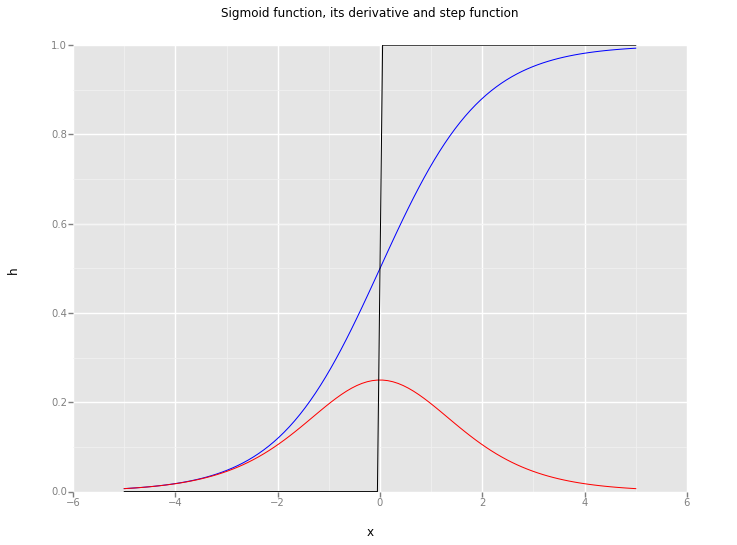

<ggplot: (287579747)>

In [14]:
x = np.linspace(-5, 5, 100)
y = phi(x)
z = phi_prime(x)
h = step_function(y, 0.5)
dat = pd.DataFrame(dict({'x': x, 'y': y, 'z': z, 'h': h}))
ggplot(aes(x='x', y='y'), data=dat) + geom_line(color='blue') \
        + geom_line(aes(x='x', y='z'), color='red') + geom_line(aes(x='x', y='h'), color='black') \
        + labs(title="Sigmoid function, its derivative and step function")

### XOR problem with Multilayer Perceptron (MLP)

* **Problem:** train your classifier to fit XOR function outputs: $$\begin{array}{| c | c | c |}
\hline
x_1 & x_2 & y \\ \hline
0 & 0 & 0 \\ \hline
0 & 1 & 1 \\ \hline
1 & 0 & 1 \\ \hline
1 & 1 & 0 \\ \hline
\end{array}$$
* Define the probability $\displaystyle{\pr\left(y=1\thinspace\middle| \thinspace \x\right)=p(\x)}$
* We could try *logistic regression* $\displaystyle{p(\x)=\frac{e^{\w^T\x}}{1+e^{\w^T\x}}=\varphi(\w^T\x)}$, where $\varphi$ - sigmoid **activation** function, but our points are **not linearly separable**.
* Let's try **several** logistic regressions with different weights: 
    * Organize them into **layers**. **Input layer** consits of input values, then several **hidden layers** follow with **output layer** at the end.
    * Each layer consists of **nodes**. Each node in layer $k$ is fully connected with nodes in the layer $k+1$.
    * Each node is the **logistic regression** itself.

### Error backpropagation ideas:

* **Chain rule for differentiation** Let $y=f(g(x))$, then $$\displaystyle{\frac{\partial y}{\partial x}=\frac{\partial f}{\partial g}\frac{\partial g}{\partial x}}$$
* **Path factorization** 
    * Let $\displaystyle{\X\underset{\alpha, \beta, \gamma}{\longrightarrow} \Y}$ denote the situation, when $\displaystyle{\frac{\partial \Y}{\partial \X}=\alpha+\beta+\gamma}$
    * Consider $\displaystyle{\X\underset{\alpha, \beta, \gamma}{\longrightarrow} \Y \underset{\delta, \epsilon, \xi}{\longrightarrow} \Z}$, then $\displaystyle{\frac{\partial \Z}{\partial \X}=\alpha\delta+\alpha\epsilon+\alpha\xi+\beta\delta+\beta\epsilon+\beta\xi+\gamma\delta+\gamma\epsilon+\gamma\xi}$ can be factorized $\displaystyle{\frac{\partial \Z}{\partial \X}=(\alpha+\beta+\gamma)(\delta+\epsilon+\xi)}$

### Multilayer perceptron with one hidden layer (squared error cost function)

**Model description**
* Input data $\X=\left(\x_1,\ldots,x_n\right)$, $\X\in\mathbb{R}^{n\times m}$, where $n$ - number of examples (samples), $m$ - number of features;
* Response data $\y=(y_1,\ldots,y_n)$, $\y\in\mathbb{R}^n$;
* Activation function $\varphi(z)$. For example - sigmoid function $\varphi(z)=\left(1+\exp(-x)\right)^{-1}$. In case of sigmoid function we also have that $\varphi^{\prime}(z)=\varphi(z)(1-\varphi(z))$.
* Hidden layer weight coefficients matrix $\w_1\in\mathbb{R}^{m\times m_2}$, where $m_2$ - number of neurons in the hidden layer.
* Output layer weight coefficients matrix $\w_2\in\mathbb{R}^{m_2\times r}$, where $r=1$ is the dimension of each component in response vector $\y$.

**MLP layers**
* Define hidden layer net input as $\z_1=\X\w_1$, where $\z_1\in\mathbb{R}^{n\times m_2}$;
* Define hidden layer activation as $\a_1=\varphi(\z_1)$, where $\a_1\in\mathbb{R}^{n\times m_2}$;
* Define output layer net input as $\z_2=\a_1\w_2$, where $\z_2\in\mathbb{R}^{n\times r}$;
* Define output layer activation as $\a_2=\varphi(\z_2)$, where $\a_2\in\mathbb{R}^{n\times r}$;
* Define error vector as $\e=\y-\a_2$
* Define the **cost function** $\color{blue}{J=\frac{1}{2}e^2}$

**Error backpropagation for the output layer**
* Consider partial derivative (applying chain rule): $\displaystyle{\frac{\partial J}{\partial \w_2}=\frac{\partial J}{\partial \e}\frac{\partial \e}{\partial \a_2}\frac{\partial \a_2}{\partial \z_2}\frac{\partial\z_2}{\partial \w_2}}$
    * $\displaystyle{\frac{\partial J}{\partial \e}=\e}$
    * $\displaystyle{\frac{\partial \e}{\partial \a_2}=-1}$
    * $\displaystyle{\frac{\partial \a_2}{\partial \z_2}=\varphi^{\prime}(\z_2)=\a_2(1-\a_2)}$
    * $\displaystyle{\frac{\partial \z_2}{\partial \w_2}=\a_1}$
    * Finally we get $\displaystyle{\frac{\partial J}{\partial \w_2}=-\e\varphi^{\prime}(\z_2)\a_1}$
    * Let's define local gradient $\displaystyle{\delta_2=\frac{\partial J}{\partial \z_2}=-\e\varphi^{\prime}(\z_2)}$
    * In terms of local gradients weight correction will be $\displaystyle{\Delta\w_2=-\eta\frac{\partial J}{\partial \w_2}=\eta\delta_2\a_1}$
    
**Error backpropagation for the hidden layer**
* Cost function in terms of $\a_1$ activation: $\displaystyle{J=\frac{1}{2}\left(\y-\varphi(\a_1\w_2)\right)^2}$
* Consider partial derivative $\displaystyle{\frac{\partial J}{\partial \w_1}=\frac{\partial J}{\partial \a_1}\frac{\partial \a_1}{\partial \z_1}\frac{\partial\z_1}{\partial \w_1}}$
    * $\displaystyle{\frac{\partial J}{\partial \a_1}=-\e\varphi^{\prime}(\z_2)\w_2}$
    * $\displaystyle{\frac{\partial \a_1}{\partial \z_1}=\varphi^{\prime}(\z_1)=\a_1(1-\a_1)}$
    * $\displaystyle{\frac{\partial \z_1}{\partial \w_1}=\X}$
    * Finally we get $\displaystyle{\frac{\partial J}{\partial \w_1}=-\e\varphi^{\prime}(\z_2)\w_2\varphi^{\prime}(\z_1)\X}$
    * Define local gradient $\displaystyle{\color{blue}{\delta_1}=\frac{\partial J}{\partial \z_1}=-\e\varphi^{\prime}(\z_2)\w_2\varphi^{\prime}(\z_1)=\color{blue}{\delta_2\w_2\varphi^{\prime}(\z_1)}}$
    * In terms of local gradients weight correction will be $\displaystyle{\Delta\w_1=-\eta\frac{\partial J}{\partial \w_1}=\eta\delta_1\X}$

#### Multilayer Perceptron for XOR problem

In [328]:
def xor_nn(X, y, n_hidden=4, epochs=1000, eta=1.):
    n_features = X.shape[1]
    n_output = y.shape[1]
    n_samples = X.shape[0]
    
    W1 = uniform(loc=-1, scale=2).rvs(n_features*n_hidden).reshape(n_features,n_hidden)
    W2 = uniform(loc=-1, scale=2).rvs(n_hidden).reshape(n_hidden,n_output)
    J = []
    trace = []
    
    for j in range(epochs):
        z1 = np.dot(X,W1)
        a1 = phi(z1)
        
        z2 = np.dot(a1,W2)
        a2 = phi(z2)
        trace.append(a2)
        e = (y-a2).reshape(-1)
        J.append((e**2).sum())
        delta2 = (y - a2)*(a2*(1-a2))
        delta1 = delta2.dot(W2.T)*(a1*(1 - a1))
        dW2 = eta*a1.T.dot(delta2)
        W2 += dW2
        dW1 = eta*X.T.dot(delta1)
        W1 += dW1
        
    trace = np.array(trace)
    return a2, np.array(J), trace

#### XOR example

In [339]:
X = np.array([ [0,0],[0,1],[1,0],[1,1]])
y = np.array([[0,1,1,0]]).T
a2, J, trace = xor_nn(X, y, n_hidden=20, epochs=1000, eta=1.)

Output activation $\a_2$

In [340]:
print('Output activation vector: \n',a2)

Output activation vector: 
 [[ 0.05236571]
 [ 0.94867249]
 [ 0.94977871]
 [ 0.05174128]]


Apply step function $h$ to the activation $\a_2$ to get estimated class labels $\hat{y}$. Compare them to the desired output $y$ to get classification score.

In [331]:
y_fit=step_function(a2, 0.5).reshape(-1)
print('Classification score: ', np.mean(y.reshape(-1)==y_fit.reshape(-1)))

Classification score:  1.0


Plot squared error cost function $J$ dynamics.

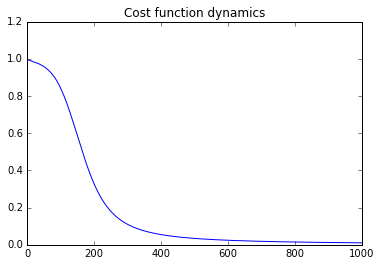

In [332]:
plt.plot(J)
plt.title('Cost function dynamics');

Plot the history of output activations $\a_2$ 

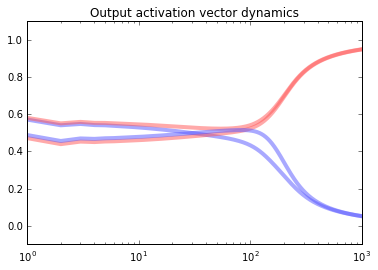

In [341]:
cmap = plt.cm.get_cmap('seismic')
colors = np.array([cmap((y.T[0][i]+1)/3)[:-1] for i in range(len(y.T[0]))])
traces = trace.T[0]
ax = plt.subplot(111)
for i, t in enumerate(traces):
    ax.plot(t, c=colors[i], alpha=0.5, lw=4)
ax.set_ylim(-0.1,1.1)
ax.set_xscale('log')
plt.title('Output activation vector dynamics');

#### Apply this MLP to another standard data set (moons)

In [342]:
n = 100
X, y = make_moons(noise=0.1, n_samples=n)
a2, J, trace = xor_nn(X, y.reshape(n,1), 
                      n_hidden=40, 
                      epochs=10000, 
                      eta=0.1)

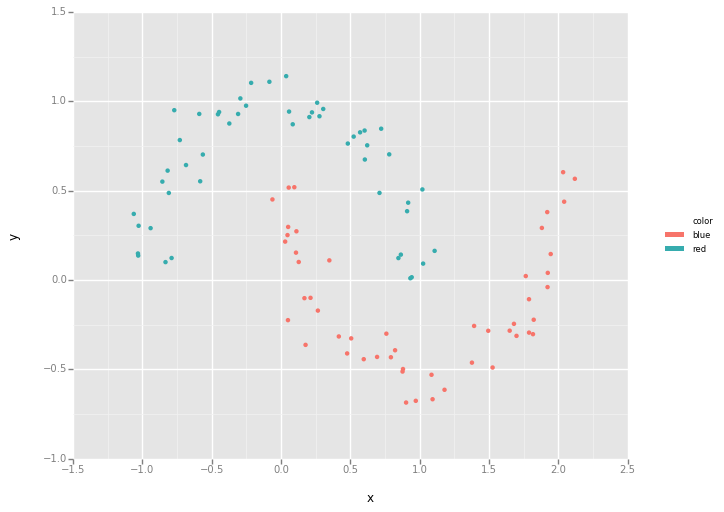

<ggplot: (302438990)>

In [343]:
dat = {'x': X.T[0], 'y': X.T[1], 'variable': y}
dat = pd.DataFrame(dat)
dat['color'] = ['red' if variable == 0 else 'blue' for variable in dat['variable']]
ggplot(aes(x='x', y='y', group='variable',color='color'),dat) + geom_point()

Apply step function $h$ to the activation $\a_2$ to get estimated class labels $\hat{y}$. Compare them to the desired output $y$ to get classification score.

In [344]:
y_fit=step_function(a2, 0.5).reshape(-1)
print('Classification score: ', np.mean(y.reshape(-1)==y_fit.reshape(-1)))

Classification score:  1.0


Plot the history of output activations $\a_2$ 

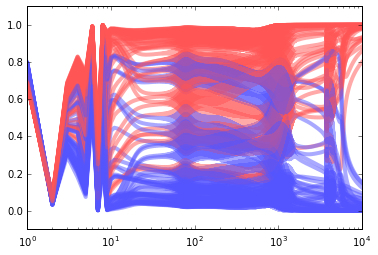

In [345]:
cmap = plt.cm.get_cmap('seismic')
colors = np.array([cmap((y[i]+1)/3)[:-1] for i in range(len(y))])
traces = trace.T[0]
ax = plt.subplot(111)
for i, t in enumerate(traces):
    ax.plot(t, c=colors[i], alpha=0.5, lw=4)
ax.set_ylim(-0.1,1.1);
ax.set_xscale('log');

Ok, not so obvious picture (at least in the middle of the history)

### Let's try a bit harder example - XOR-like data set (checkerboard)

In [346]:
def make_checkerboard(n_samples = 100):
    X = uniform(loc=-1, scale=2).rvs(size=n_samples*2).reshape(n_samples, 2)
    y = np.zeros(n_samples)
    for i in range(X.shape[0]):
        if X[i, 0]*X[i, 1] < 0:
            y[i] = 1
    return X, y

In [355]:
n = 100
X, y = make_checkerboard(n_samples=n)
a2, J, trace = xor_nn(X, y.reshape(n,1), 
                      n_hidden=20, 
                      epochs=10000, 
                      eta=0.1)

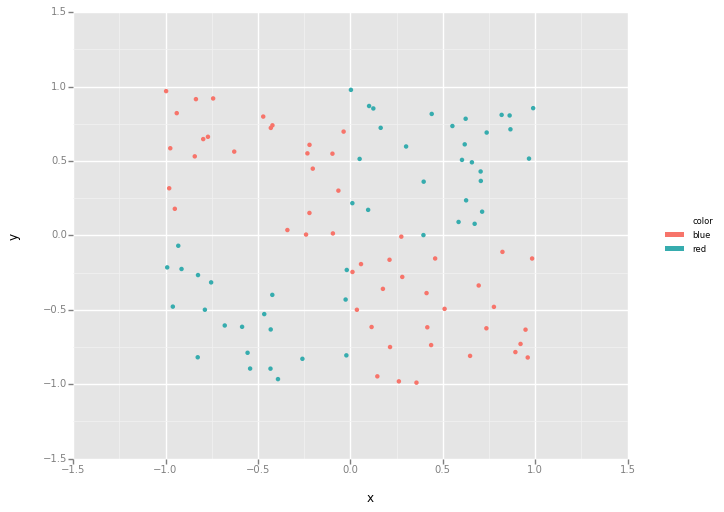

<ggplot: (305751325)>

In [356]:
dat = {'x': X.T[0], 'y': X.T[1], 'variable': y}
dat = pd.DataFrame(dat)
dat['color'] = ['red' if variable == 0 else 'blue' for variable in dat['variable']]
ggplot(aes(x='x', y='y', group='variable',color='color'),dat) + geom_point()

Apply step function $h$ to the activation $\a_2$ to get estimated class labels $\hat{y}$. Compare them to the desired output $y$ to get classification score.

In [353]:
y_fit=step_function(a2, 0.5).reshape(-1)
print('Classification score: ', np.mean(y.reshape(-1)==y_fit.reshape(-1)))

Classification score:  0.9


Plot the history of output activations $\a_2$ 

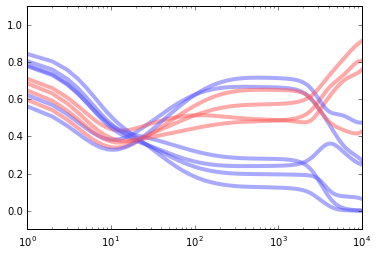

In [354]:
cmap = plt.cm.get_cmap('seismic')
colors = np.array([cmap((y[i]+1)/3)[:-1] for i in range(len(y))])
traces = trace.T[0]
ax = plt.subplot(111)
for i, t in enumerate(traces):
    ax.plot(t, c=colors[i], alpha=0.5, lw=4)
ax.set_ylim(-0.1,1.1);
ax.set_xscale('log');

Try different number of points in the dataset and plot score against the number of points.

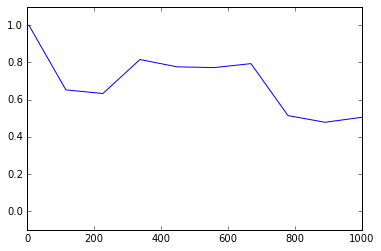

In [357]:
n = np.linspace(5, 1000, 10)
score = []
for i in n:
    X, y = make_checkerboard(n_samples=int(i))
    a2, J, trace = xor_nn(X, y.reshape(int(i),1), n_hidden=20, epochs=10000, eta=0.1)
    y_fit=step_function(a2, 0.5).reshape(-1)
    score.append(np.mean(y.reshape(-1)==y_fit.reshape(-1)))
score = np.array(score)

ax = plt.subplot(111)
ax.plot(n, score)
ax.set_ylim(-0.1,1.1);
#ax.set_xscale('log');

What's the reason for the score decrease? We have several things to look at:
* Another cost function $\color{red}\diamond$
* Bias terms $\color{red}\diamond$$\color{red}\diamond$
* Learning rate $\color{red}\diamond$$\color{red}\diamond$$\color{red}\diamond$

$\color{red}\diamond$ **Another cost function**

### Multilayer perceptron with one hidden layer (logistic log-likelihood cost function)

**Model description**
* Input data $\X=\left(\x_1,\ldots,x_n\right)$, $\X\in\mathbb{R}^{n\times m}$, where $n$ - number of examples (samples), $m$ - number of features;
* Response data $\y=(y_1,\ldots,y_n)$, $\y\in\mathbb{R}^n$;
* Activation function $\varphi(z)$. For example - sigmoid function $\varphi(z)=\left(1+\exp(-x)\right)^{-1}$. In case of sigmoid function we also have that $\varphi^{\prime}(z)=\varphi(z)(1-\varphi(z))$.
* Hidden layer weight coefficients matrix $\w_1\in\mathbb{R}^{m\times m_2}$, where $m_2$ - number of neurons in the hidden layer.
* Output layer weight coefficients matrix $\w_2\in\mathbb{R}^{m_2\times r}$, where $r=1$ is the dimension of each component in response vector $\y$.

**MLP layers**
* Define hidden layer net input as $\z_1=\X\w_1$, where $\z_1\in\mathbb{R}^{n\times m_2}$;
* Define hidden layer activation as $\a_1=\varphi(\z_1)$, where $\a_1\in\mathbb{R}^{n\times m_2}$;
* Define output layer net input as $\z_2=\a_1\w_2$, where $\z_2\in\mathbb{R}^{n\times r}$;
* Define output layer activation as $\a_2=\varphi(\z_2)$, where $\a_2\in\mathbb{R}^{n\times r}$;
* Define error vector as $\e=\y-\a_2$
* Define the **cost function** $\color{blue}{J=\y\log\a_2+(1-\y)\log(1-\a_2)}$

**Error backpropagation for the output layer**
* Consider partial derivative (applying chain rule): $\displaystyle{\frac{\partial J}{\partial \w_2}=\frac{\partial J}{\partial \a_2}\frac{\partial \a_2}{\partial \z_2}\frac{\partial\z_2}{\partial \w_2}}$
    * $\displaystyle{\frac{\partial J}{\partial \a_2}=\frac{\y}{\a_2}-\frac{1-\y}{1-\a_2}}$
    * $\displaystyle{\frac{\partial \a_2}{\partial \z_2}=\varphi^{\prime}(\z_2)=\a_2(1-\a_2)}$
    * $\displaystyle{\frac{\partial \z_2}{\partial \w_2}=\a_1}$
    * Finally we get $\displaystyle{\frac{\partial J}{\partial \w_2}=\left(\frac{\y}{\a_2}-\frac{1-\y}{1-\a_2}\right)\a_2(1-\a_2)\a_1=(\y-\a_2)\a_1}$
    * Let's define local gradient $\displaystyle{\delta_2=\frac{\partial J}{\partial \z_2}=\y-\a_2}$
    * In terms of local gradients weight correction will be $\displaystyle{\Delta\w_2=-\eta\frac{\partial J}{\partial \w_2}=\eta\delta_2\a_1}$
    
**Error backpropagation for the hidden layer**
* Cost function in terms of $\a_1$ activation: $\displaystyle{J=\y\log\varphi(\a_1\w_2)+(1-\y)\log\left(1-\varphi(\a_1\w_2)\right)}$
* Consider partial derivative $\displaystyle{\frac{\partial J}{\partial \w_1}=\frac{\partial J}{\partial \a_1}\frac{\partial \a_1}{\partial \z_1}\frac{\partial\z_1}{\partial \w_1}}$
    * $\displaystyle{\frac{\partial J}{\partial \a_1}=\left(\frac{\y}{\varphi(\z_2)}-\frac{1-\y}{1-\varphi(\z_2)}\right)\varphi(\z_2)(1-\varphi(\z_2))\w_2=(\y-\a_2)\w_2}$
    * $\displaystyle{\frac{\partial \a_1}{\partial \z_1}=\varphi^{\prime}(\z_1)=\a_1(1-\a_1)}$
    * $\displaystyle{\frac{\partial \z_1}{\partial \w_1}=\X}$
    * Finally we get $\displaystyle{\frac{\partial J}{\partial \w_1}=(\y-\a_2)\w_2\varphi^{\prime}(\z_1)\X}$
    * Define local gradient $\displaystyle{\color{blue}{\delta_1}=\frac{\partial J}{\partial \z_1}=(\y-\a_2)\w_2\varphi^{\prime}(\z_1)=\color{blue}{\delta_2\w_2\varphi^{\prime}(\z_1)}}$
    * In terms of local gradients weight correction will be $\displaystyle{\Delta\w_1=-\eta\frac{\partial J}{\partial \w_1}=\eta\delta_1\X}$

$\color{red}\diamond$$\color{red}\diamond$ **Bias term**

Note, that bias term **is not** affected by the input from the **previous** layer. You have to take this into account while performing weight update.

* So, during the **feedworward** you have to **add** bias to the activations (except for the output layer, where it doesn't make sense). $\X$ is also is an activation for the input layer.
```python
a1 = np.hstack((np.ones(n_samples).reshape(-1,1),a1))
```
* Performing weight update you have to **reduce** your local gradients vector (passing it the previous layer, which doesn't affect bias of the current layer):
```python
dW1 = eta*X.T.dot(delta1[:,1:])
```
* Adding bias changes $\text{n_hidden}$ dimention for the hidden layer (because we add bias). So we'll have two different $\text{n_hidden}$ dimentions: one for the weight matrix between input layer and the hidden one, and another for the weight matrix between hidden layer and the output layer.

$\color{red}\diamond$$\color{red}\diamond$$\color{red}\diamond$ **Learning rate**

**Weight update rule**
$\displaystyle{\Delta\w_k=-\eta\frac{\partial J}{\partial \w_k}=\eta\delta_k\a_{k-1}}$, where $\a_0=\X$

**Generalized delta rule**
$\displaystyle{\Delta\w_k(t)=\color{blue}{\alpha}\Delta\w_k(\color{blue}{t-1})+\eta\delta_k(t)\a_{k-1}(t)}$, where $t$ stands for the *iteration number*.

Let's implement all this ideas in one function.

In [418]:
def xor_nn(X, y, n_hidden=4, epochs=1000, loss='squared', eta=1., alpha=.1, add_bias=True):
    n_features = X.shape[1]
    n_hidden_2 = n_hidden
    n_output = y.shape[1]
    n_samples = X.shape[0]
    # add bias
    if add_bias:
        X = np.hstack((np.ones(n_samples).reshape(-1,1),X))
        n_features += 1
        n_hidden_2 += 1
    
    W1 = uniform(loc=-1, scale=2).rvs(n_features*n_hidden).reshape(n_features,n_hidden)
    W2 = uniform(loc=-1, scale=2).rvs(n_hidden_2).reshape(n_hidden_2,n_output)
    J = []
    trace = []
    dW1_prev = np.zeros_like(W1)
    dW2_prev = np.zeros_like(W2)
    for j in range(epochs):
        z1 = np.dot(X,W1)
        a1 = phi(z1)
        # add bias
        if add_bias:
            a1 = np.hstack((np.ones(n_samples).reshape(-1,1),a1))
        z2 = np.dot(a1,W2)
        a2 = phi(z2)
        trace.append(a2)
        if loss == 'squared':
            e = (y-a2).reshape(-1)
            J.append((e**2).sum())
            delta2 = (y - a2)*(a2*(1-a2))
        elif loss == 'logistic':
            J.append(-(y*np.log(a2)+(1-y)*np.log(1-a2)).sum())
            delta2 = (y - a2)
        else:
            raise AttributeError('Loss must be `squared` or `logistic`')
        delta1 = delta2.dot(W2.T)*(a1*(1 - a1))
        dW2 = eta*a1.T.dot(delta2)
        W2 += dW2
        if add_bias:
            dW1 = eta*X.T.dot(delta1[:,1:])
        else:
            dW1 = eta*X.T.dot(delta1)
        W1 += dW1
        W1 += alpha*dW1_prev
        W2 += alpha*dW2_prev
        dW1_prev, dW2_prev = dW1, dW2
        
    trace = np.array(trace)
    return a2, np.array(J), trace

Consider checkerboard data set.

In [419]:
n = 100
X, y = make_checkerboard(n_samples=n)
a2, J, trace = xor_nn(X, y.reshape(n,1), 
                      n_hidden=20, 
                      epochs=10000, 
                      loss='logistic', 
                      eta=0.01, 
                      alpha=0.1, 
                      add_bias=True)

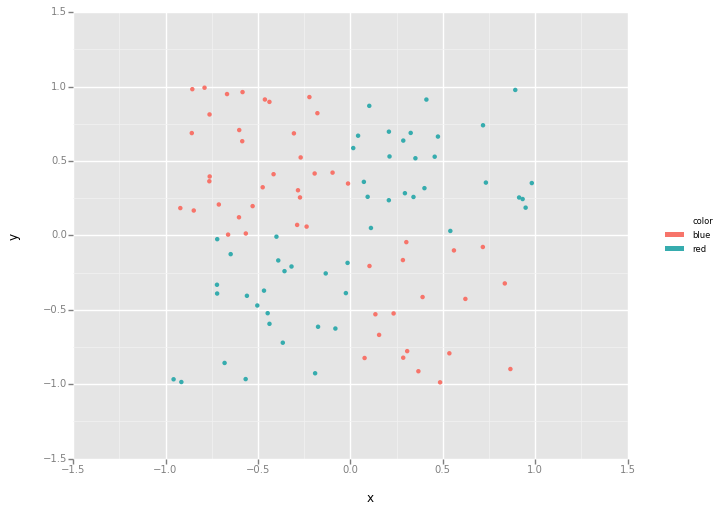

<ggplot: (304213985)>

In [420]:
dat = {'x': X.T[0], 'y': X.T[1], 'variable': y}
dat = pd.DataFrame(dat)
dat['color'] = ['red' if variable == 0 else 'blue' for variable in dat['variable']]
ggplot(aes(x='x', y='y', group='variable',color='color'),dat) + geom_point()

Plot the history of output activations $\a_2$ 

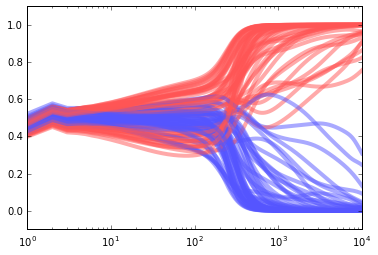

In [421]:
cmap = plt.cm.get_cmap('seismic')
colors = np.array([cmap((y[i]+1)/3)[:-1] for i in range(len(y))])
traces = trace.T[0]
ax = plt.subplot(111)
for i, t in enumerate(traces):
    ax.plot(t, c=colors[i], alpha=0.5, lw=4)
ax.set_ylim(-0.1,1.1);
ax.set_xscale('log');

Try different number of points in the dataset and plot score against the number of points.

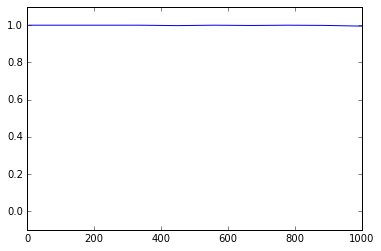

In [82]:
n = np.linspace(5, 1000, 10)
score = []
for i in n:
    X, y = make_checkerboard(n_samples=int(i))
    a2, J, trace = a2, J, trace = xor_nn(X, y.reshape(int(i),1), 
                      n_hidden=20, 
                      epochs=10000, 
                      loss='logistic', 
                      eta=0.01, 
                      alpha=0.1, 
                      add_bias=True)
    y_fit=step_function(a2, 0.5).reshape(-1)
    score.append(np.mean(y.reshape(-1)==y_fit.reshape(-1)))
score = np.array(score)

ax = plt.subplot(111)
ax.plot(n, score)
ax.set_ylim(-0.1,1.1);
#ax.set_xscale('log');

### Multilayer Perceptron for bi-class classification task

**Model components:**
* Training sample $\{\x(i),\y(i)\}_{i=1}^n$, 
* activation (sigmoid) function $\varphi$ and it's derivative $\varphi^{\prime}$,
* cost function $\displaystyle{J=\sum e_i^2}$

Consider MLP with **one** hidden layer, denoted with $h$ subscript. Subsript $o$ will denote output layer.
* **Weights initialization** Take $\w\sim \mathbb{U}[-\sigma,\sigma]$ for elements of $W_h$, $W_o$ of weight matrices
* **Forward computation** 
    * calculate local field (net input) for hidden layer $Z_h=W_h^T\X$, 
    * activation for hidden layer $A_h=\varphi(Z_h)$, 
    * local field for output layer $Z_o=W_o^TA_h$, 
    * activation for output layer $A_o=\varphi(Z_o)$ 
* **Error signal** $e=y-y_o$, where $y_o=h(A_o)$, $h$ - step function
* **Error backpropagation:** 
    * Compute sensitivity components 
        * $\delta_o=e\varphi^{\prime}(Z_o)$ for the output layer and
        * $\delta_h=\varphi^{\prime}(Z_h)W_o^T\delta_o$ for the hidden layer, 
    * then compute local gradients 
        * $\Delta_o = \delta_o^TZ_h$ and 
        * $\Delta_h=\delta_h^TX$
* **Update weights** according to gradient descent algorithm $w_*(n+1)=w_*(n)+\alpha\w_*(n-1)+\eta\Delta_*(n)$, where $*$ stands for $o$ or $h$ subscripts and $\alpha$ - is momentum constant, $\eta$ - learning rate.

Combine all this ideas in one class. Add decision regions plots and layer decision functions plots.

In [362]:
class MultilayerPerceptron(object):
    
    def __init__(self, n_features, n_hidden, n_output=1, 
                 epochs=1000, eta=0.01, alpha = 0.01, sigma=1.0, slope=1.0, loss='squared', add_bias=True):
        self.n_features_ = n_features
        self.n_hidden = n_hidden
        self.n_hidden_ = n_hidden
        self.n_output_ = n_output
        self.epochs_ = epochs
        self.eta_ = eta
        self.alpha_ = alpha
        self.sigma_ = sigma
        self.slope_ = slope
        if loss == 'squared' or loss == 'logistic':
            self.loss_ = loss
        else:
            raise AttributeError('Loss must be `squared` or `logistic`')
        self.add_bias_ = add_bias
        if self.add_bias_:
            self.n_features_ +=1
            self.n_hidden_ +=1
        
    def _initialize_weights(self, sigma = None):
        if sigma == None:
            sigma = self.sigma_
        loc = -sigma
        scale = 2*sigma
        self.Wh_ = uniform.rvs(loc, scale, size=self.n_features_*self.n_hidden).reshape(self.n_features_, self.n_hidden)
        self.Wo_ = uniform.rvs(loc,scale,size=self.n_hidden_*self.n_output_).reshape(self.n_hidden_, self.n_output_)
    
    def _sigmoid(self, x, slope = None):
        if slope == None:
            slope = self.slope_
        return phi(x, slope)
    
    def _sigmoid_gradient_to_activation(self, x):
        return x*(1 - x)
    
    def _feedforward(self, X, Wh, Wo):
        n_samples = X.shape[0]
        if self.add_bias_:
            X = np.hstack((np.ones(n_samples).reshape(-1,1),X))
        Zh = X.dot(Wh)
        Ah = self._sigmoid(Zh)
        if self.add_bias_:
            if Ah.ndim == 1:
                Ah = Ah[:,np.newaxis]
            Ah = np.hstack((np.ones(n_samples).reshape(-1,1),Ah))
        Zo = Ah.dot(Wo)
        Ao = self._sigmoid(Zo)
        return X, Zh, Ah, Zo, Ao
    
    def _backpropagation(self, X, Zh, Ah, Ao, Zo, y, Wh, Wo):
        # sensitivity components
        delta_o = y - Ao
        if self.loss_ == 'squared':
            self.cost_.append((delta_o.reshape(-1)**2).sum())
            delta_o = delta_o*self._sigmoid_gradient_to_activation(Ao)
        elif self.loss_ == 'logistic':
            self.cost_.append(-(y*np.log(Ao)+(1-y)*np.log(1-Ao)).sum())
        delta_h = delta_o.dot(Wo.T)*self._sigmoid_gradient_to_activation(Ah)
        # local gradients
        grad_o = np.dot(Ah.T, delta_o)
        if self.add_bias_:
            grad_h = X.T.dot(delta_h[:,1:])
        else:
            grad_h = X.T.dot(delta_h)
        return grad_h, grad_o
    
    def predict(self, X, Wh = None, Wo = None):
        if Wh == None:
            Wh = self.Wh_
        if Wo == None:
            Wo= self.Wo_
        X_, Zh, Ah, Zo, Ao = self._feedforward(X, Wh, Wo)
        y_pred = Ao
        y_pred = step_function(y_pred, 0.5)
        return y_pred
    
    def decision_function(self, X, Wh = None, Wo = None):
        if Wh == None:
            Wh = self.Wh_
        if Wo == None:
            Wo= self.Wo_
        X_, Zh, Ah, Zo, Ao = self._feedforward(X, Wh, Wo)
        return Ao
    
    def fit(self, X, y):
        self._initialize_weights()
        self.X_inp, self.y_inp = X.copy(), y.copy().reshape(len(y),1)
        dWh_prev = np.zeros(self.Wh_.shape)
        dWo_prev = np.zeros(self.Wo_.shape)
        self.errors_ = []
        self.cost_ = []
        self.trace_ = []
        for i in range(self.epochs_):
            # feedforward
            X_, Zh, Ah, Zo, Ao = self._feedforward(self.X_inp, self.Wh_, self.Wo_)
            self.trace_.append(Ao)
            # backpropagation
            grad_h, grad_o = self._backpropagation(X_, Zh, Ah, Ao, Zo, self.y_inp, self.Wh_, self.Wo_)
            dWh, dWo = self.eta_*grad_h, self.eta_*grad_o
            # weight update
            self.Wh_ += (dWh + (self.alpha_*dWh_prev))
            self.Wo_ += (dWo + (self.alpha_*dWo_prev))
            dWh_prev, dWo_prev = dWh, dWo
            # compute cost
            errors = self.y_inp - self.predict(self.X_inp)
            self.errors_.append(np.absolute(errors).sum())
        self.errors_ = np.array(self.errors_)
        self.cost_ = np.array(self.cost_)
        self.trace_ = np.array(self.trace_)
        return self
    
    def plot_layers(self):
        plt.figure(figsize=(8, 20))
        for i in range(self.n_hidden):
            plt.subplot(self.n_hidden_ / 2, 2, i + 1)
            Wh = self.Wh_.T[i]
            Wo = np.array (self.Wo_.T[0][i])
            warnings.filterwarnings ("ignore")
            plot_decision_function(self.X_inp, self.y_inp.reshape(-1), self, Wh, Wo)
        plt.show()
    
    def score(self, X, y):
        return (self.predict(X).reshape(-1)==y.reshape(-1)).sum()/len(y)

### Toy data for classification: checkerboard data set

In [363]:
X, y = make_checkerboard(n_samples=1000)

In [364]:
X = scale(X)

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dat = {'x': X_train.T[0], 'y': X_train.T[1], 'variable': y_train}

In [366]:
dat = pd.DataFrame(dat)
dat['color'] = ['red' if variable == 0 else 'blue' for variable in dat['variable']]

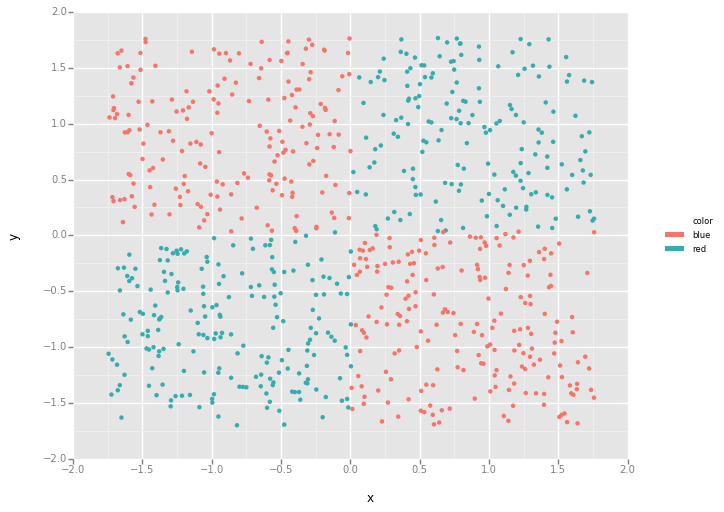

<ggplot: (-9223372036556527230)>

In [367]:
ggplot(aes(x='x', y='y', group='variable',color='color'),dat) + geom_point()

Feed the data to the MLP class. Check train and test scores.

In [368]:
mlp = MultilayerPerceptron(n_features=X_train.shape[1], 
                           eta=.01, 
                           alpha=.1, 
                           sigma = 1., 
                           n_hidden=20, 
                           loss='logistic',
                           epochs=1000, add_bias=True)
mlp.fit(X_train, y_train.T)
print('Train score %.3f, Test score %.3f'% (mlp.score(X_train, y_train),mlp.score(X_test, y_test)))

Train score 0.992, Test score 0.988


Plot the history of output activations $\a_2$ 

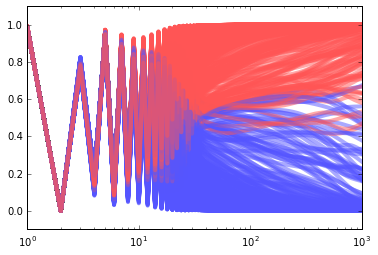

In [369]:
cmap = plt.cm.get_cmap('seismic')
colors = np.array([cmap((y_train[i]+1)/3)[:-1] for i in range(len(y_train))])
traces = mlp.trace_.T[0]
ax = plt.subplot(111)
for i, t in enumerate(traces):
    ax.plot(t, c=colors[i], alpha=0.5, lw=4)
ax.set_ylim(-0.1,1.1);
ax.set_xscale('log');

Plot the decision regions.

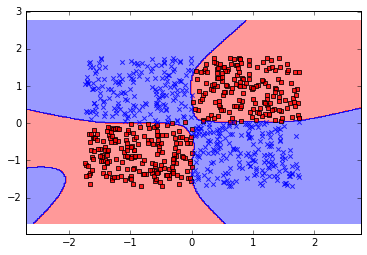

In [370]:
plot_decision_regions(X_train, y_train, mlp)

Plot cost function dynamics.

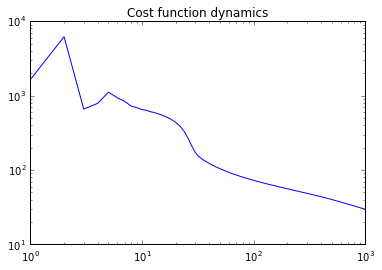

In [371]:
ax = plt.subplot(111)
ax.plot(mlp.cost_)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Cost function dynamics')
plt.show()

** Composition of MLP neurons decision functions**

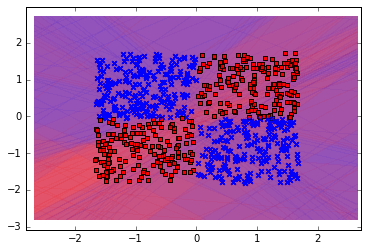

In [149]:
for i in range(mlp.n_hidden):
    Wh = mlp.Wh_.T[i]
    if mlp.add_bias_:
        shift =1
    else:
        shift = 0
    Wo = np.array(mlp.Wo_.T[0][i+shift])
    warnings.filterwarnings ("ignore")
    plot_decision_function(X_train, y_train, mlp, Wh, Wo, layer_alpha=0.05)

**MLP neurons decision functions**

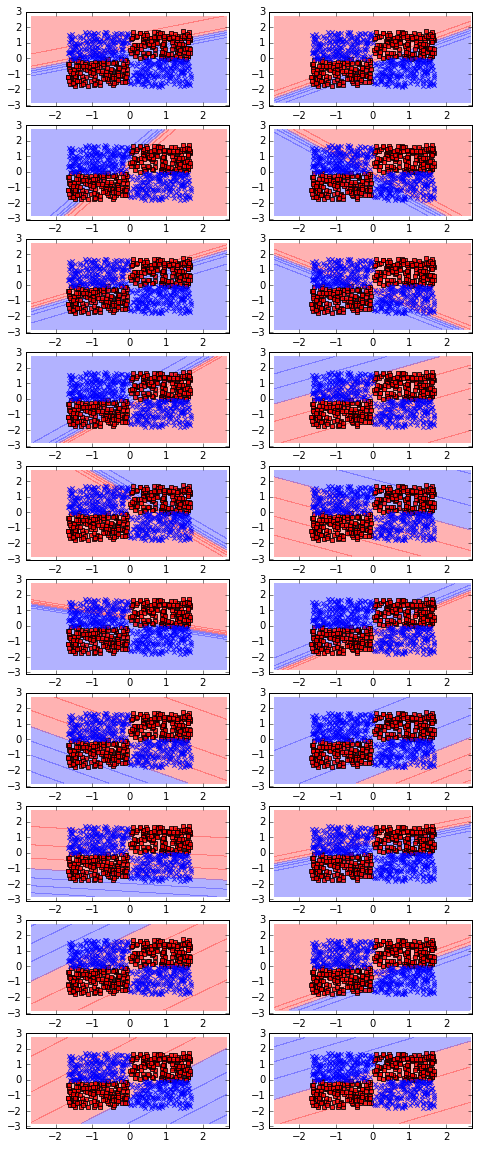

In [150]:
mlp.plot_layers()

### Multiclass classification with MLP

Let's encode outputs via *onehot* encoder which produces vectors, containing 1 in the position equal to the class number and 0 elsewhere.

In [372]:
def onehot_encode(y, k):
    if k > 2:
        a = np.zeros((y.shape[0], k))
        for idx, val in enumerate(y):
            a[idx, val] = 1.0
    else:
        a = y.reshape(len(y),1)
    return a

In [373]:
def onehot_decode(a):
    if a.ndim ==1:
        return a
    elif a.shape[1] == 1:
        return a.reshape(-1)
    else:
        return np.array([np.where(row == 1) for row in a]).reshape(-1)

In [374]:
y = np.array([0,1,2,3,2,1])
onehot_encode(y, 4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [375]:
onehot_decode(onehot_encode(y, 4))

array([0, 1, 2, 3, 2, 1])

In [376]:
y = np.array([0,1,1,0,1])
onehot_encode(y, 1)

array([[0],
       [1],
       [1],
       [0],
       [1]])

In [377]:
onehot_decode(onehot_encode(y, 2))

array([0, 1, 1, 0, 1])

Combine all this ideas in one class. Remove layers decision regions plots from the implementation.

In [378]:
class MultilayerPerceptron(object):
    
    def __init__(self, n_features, n_hidden, n_output=1, 
                 epochs=1000, eta=0.01, alpha = 0.01, sigma=1.0, slope=1.0, loss='squared', add_bias=True):
        self.n_features_ = n_features
        self.n_hidden = n_hidden
        self.n_hidden_ = n_hidden
        self.n_output_ = n_output
        self.epochs_ = epochs
        self.eta_ = eta
        self.alpha_ = alpha
        self.sigma_ = sigma
        self.slope_ = slope
        if loss == 'squared' or loss == 'logistic':
            self.loss_ = loss
        else:
            raise AttributeError('Loss must be `squared` or `logistic`')
        self.add_bias_ = add_bias
        if self.add_bias_:
            self.n_features_ +=1
            self.n_hidden_ +=1
        
    def _initialize_weights(self, sigma = None):
        if sigma == None:
            sigma = self.sigma_
        loc = -sigma
        scale = 2*sigma
        self.Wh_ = uniform.rvs(loc, scale, size=self.n_features_*self.n_hidden).reshape(self.n_features_, self.n_hidden)
        self.Wo_ = uniform.rvs(loc,scale,size=self.n_hidden_*self.n_output_).reshape(self.n_hidden_, self.n_output_)
    
    def _sigmoid(self, x, slope = None):
        if slope == None:
            slope = self.slope_
        return phi(x, slope)
    
    def _sigmoid_gradient_to_activation(self, x):
        return x*(1 - x)
    
    def _feedforward(self, X, Wh, Wo):
        n_samples = X.shape[0]
        if self.add_bias_:
            X = np.hstack((np.ones(n_samples).reshape(-1,1),X))
        Zh = X.dot(Wh)
        Ah = self._sigmoid(Zh)
        if self.add_bias_:
            if Ah.ndim == 1:
                Ah = Ah[:,np.newaxis]
            Ah = np.hstack((np.ones(n_samples).reshape(-1,1),Ah))
        Zo = Ah.dot(Wo)
        Ao = self._sigmoid(Zo)
        return X, Zh, Ah, Zo, Ao
    
    def _backpropagation(self, X, Zh, Ah, Ao, Zo, y, Wh, Wo):
        # sensitivity components
        delta_o = y - Ao
        if self.loss_ == 'squared':
            self.cost_.append((delta_o.reshape(-1)**2).sum())
            delta_o = delta_o*self._sigmoid_gradient_to_activation(Ao)
        elif self.loss_ == 'logistic':
            self.cost_.append(-(y*np.log(Ao)+(1-y)*np.log(1-Ao)).sum())
        delta_h = delta_o.dot(Wo.T)*self._sigmoid_gradient_to_activation(Ah)
        # local gradients
        grad_o = np.dot(Ah.T, delta_o)
        if self.add_bias_:
            grad_h = X.T.dot(delta_h[:,1:])
        else:
            grad_h = X.T.dot(delta_h)
        return grad_h, grad_o
    
    def predict(self, X, Wh = None, Wo = None):
        if Wh == None:
            Wh = self.Wh_
        if Wo == None:
            Wo= self.Wo_
        X_, Zh, Ah, Zo, Ao = self._feedforward(X, Wh, Wo)
        y_pred = Ao
        if self.n_output_ == 1: 
            y_pred = step_function(y_pred, 0.5)
        else:
            y_pred = np.argmax(Ao, axis=1)
        return y_pred
    
    def decision_function(self, X, Wh = None, Wo = None):
        if Wh == None:
            Wh = self.Wh_
        if Wo == None:
            Wo= self.Wo_
        X_, Zh, Ah, Zo, Ao = self._feedforward(X, Wh, Wo)
        return Ao
    
    def fit(self, X, y):
        self.X_inp, self.y_inp = X.copy(), onehot_encode(y, np.max(y)+1)
        if self.y_inp.ndim > 1:
            self.n_output_ = self.y_inp.shape[1]
        self._initialize_weights()
        dWh_prev = np.zeros(self.Wh_.shape)
        dWo_prev = np.zeros(self.Wo_.shape)
        self.errors_ = []
        self.cost_ = []
        self.trace_ = []
        for i in range(self.epochs_):
            # feedforward
            X_, Zh, Ah, Zo, Ao = self._feedforward(self.X_inp, self.Wh_, self.Wo_)
            self.trace_.append(Ao)
            # backpropagation
            grad_h, grad_o = self._backpropagation(X_, Zh, Ah, Ao, Zo, self.y_inp, self.Wh_, self.Wo_)
            dWh, dWo = self.eta_*grad_h, self.eta_*grad_o
            # weight update
            self.Wh_ += (dWh + (self.alpha_*dWh_prev))
            self.Wo_ += (dWo + (self.alpha_*dWo_prev))
            dWh_prev, dWo_prev = dWh, dWo
            # compute cost
            errors = y - self.predict(self.X_inp)
            self.errors_.append(np.absolute(errors).sum())
        self.errors_ = np.array(self.errors_)
        self.cost_ = np.array(self.cost_)
        self.trace_ = np.array(self.trace_)
        return self
    
    def score(self, X, y):
        y_pred = onehot_decode(self.predict(X))
        return (y_pred.reshape(-1)==y.reshape(-1)).sum()/len(y)

Try first our usual checkerboard data set.

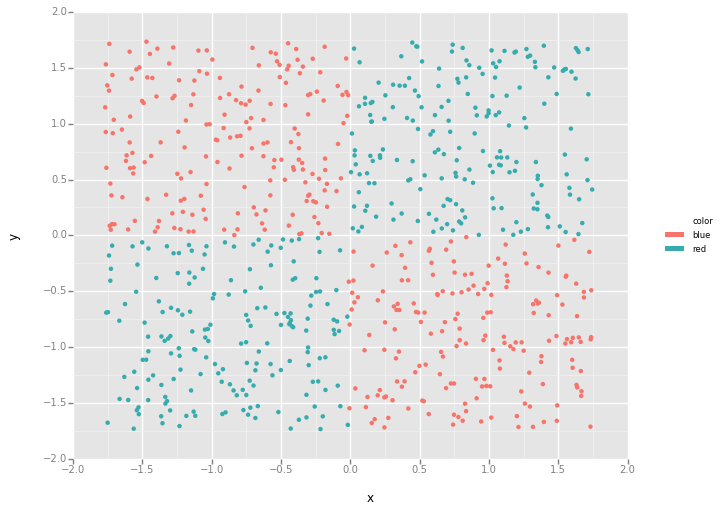

<ggplot: (-9223372036552494034)>

In [379]:
X, y = make_checkerboard(n_samples=1000)
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dat = {'x': X_train.T[0], 'y': X_train.T[1], 'variable': y_train}
dat = pd.DataFrame(dat)
dat['color'] = ['red' if variable == 0 else 'blue' for variable in dat['variable']]
ggplot(aes(x='x', y='y', group='variable',color='color'),dat) + geom_point()

In [380]:
mlp = MultilayerPerceptron(n_features=X_train.shape[1], 
                           eta=.01, 
                           alpha=.1, 
                           sigma = 1., 
                           n_hidden=20, 
                           loss='logistic',
                           epochs=1000, add_bias=True)
mlp.fit(X_train, y_train.T)
print('Train score %.3f, Test score %.3f'% (mlp.score(X_train, y_train),mlp.score(X_test, y_test)))

Train score 0.996, Test score 0.976


Plot the history of output activations $\a_2$ 

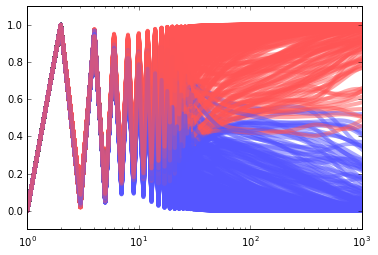

In [381]:
cmap = plt.cm.get_cmap('seismic')
colors = np.array([cmap((y_train[i]+1)/3)[:-1] for i in range(len(y_train))])
traces = mlp.trace_.T[0]
ax = plt.subplot(111)
for i, t in enumerate(traces):
    ax.plot(t, c=colors[i], alpha=0.5, lw=4)
ax.set_ylim(-0.1,1.1);
ax.set_xscale('log');

### MNIST data set with MLP classifier

In [382]:
from sklearn.datasets import load_digits

In [383]:
digits = load_digits()

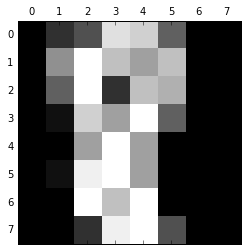

In [384]:
plt.gray() 
plt.matshow(digits.images[76]) 
plt.show(); 

In [385]:
n_samples = len(digits.images)

In [386]:
X, y = digits.images.reshape(n_samples, -1), digits.target

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Apply MLP classifier to the MNIST data set. Get train and test scores.

In [388]:
mlp = MultilayerPerceptron(n_features=X_train.shape[1], 
                           eta=.001, 
                           alpha=.01, 
                           sigma = 1., 
                           n_hidden=64, 
                           loss='logistic',
                           epochs=1000, add_bias=True)
mlp.fit(X_train, y_train.T)
print('Train score %.3f, Test score %.3f'% (mlp.score(X_train, y_train),mlp.score(X_test, y_test)))

Train score 0.999, Test score 0.960


Plot the history of output activations $\a_2$ 

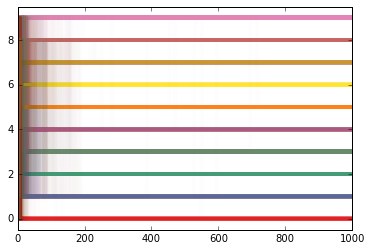

In [389]:
trace = np.array([np.argmax(mlp.trace_[i], axis=1) for i in range(mlp.trace_.shape[0])])
cmap = plt.cm.get_cmap('Set1')
traces = np.vstack((trace,y_train)).T
ax = plt.subplot(111)
colors = np.array([cmap(y_train[i]/mlp.n_output_)[:-1] for i in range(len(y_train))])
for i, trace in enumerate(traces):
    ax.plot(trace[:-1], c=colors[i], alpha=0.01, lw=4)
ax.set_ylim(-0.5,9.5);
#ax.set_xscale('log');

Consider, what are the failed examples.

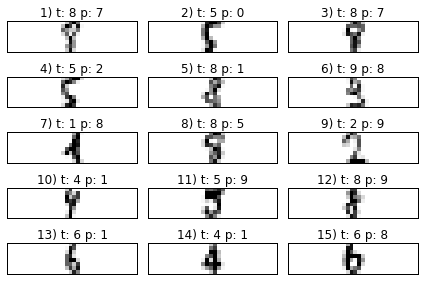

In [390]:
y_test_pred = mlp.predict(X_test)

miscl_img = X_test[y_test != y_test_pred][:15]
correct_lab = y_test[y_test != y_test_pred][%15]
miscl_lab = y_test_pred[y_test != y_test_pred][:15]

fig, ax = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    img = miscl_img[i].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

** Profiling MLP implementation with iPython "magic" functions**

In [391]:
%lprun -s -f mlp.fit -T lp_results.txt mlp.fit(X_train, y_train)
%cat lp_results.txt


*** Profile printout saved to text file 'lp_results.txt'. 
Timer unit: 1e-06 s

Total time: 4.3508 s
File: <ipython-input-378-432a236fdd89>
Function: fit at line 91

Line #      Hits         Time  Per Hit   % Time  Line Contents
    91                                               def fit(self, X, y):
    92         1         1584   1584.0      0.0          self.X_inp, self.y_inp = X.copy(), onehot_encode(y, np.max(y)+1)
    93         1            2      2.0      0.0          if self.y_inp.ndim > 1:
    94         1            3      3.0      0.0              self.n_output_ = self.y_inp.shape[1]
    95         1          366    366.0      0.0          self._initialize_weights()
    96         1            4      4.0      0.0          dWh_prev = np.zeros(self.Wh_.shape)
    97         1            2      2.0      0.0          dWo_prev = np.zeros(self.Wo_.shape)
    98         1           10     10.0      0.0          self.errors_ = []
    99         1            8      8.0      0.0   

## TensorFlow Introduction

In [392]:
import tensorflow as tf

### TensorFlow Graph vizualization

* https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb
* http://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter
* http://nbviewer.jupyter.org/github/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

In [393]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

### Computation graph

In [394]:
# define variables
a = tf.Variable(1., dtype=tf.float32, name='a')
b = tf.Variable(2., dtype=tf.float32, name='b')
# define operations
c = a + b
# initialize variables
init = tf.global_variables_initializer()
# define session
sess = tf.Session()
# run session (init)
sess.run(init)
# get result
res = sess.run([c])
print(res)

[3.0]


In [395]:
graph_def = tf.get_default_graph().as_graph_def()

In [397]:
show_graph(graph_def)

### XOR MLP with TensorFlow

Make an implementation of the simpliest version of our MLP for the XOR problem.

In [402]:
def xor_nn_tf(X, y, n_hidden=4, epochs=1000, eta = 1., loss='squared'):
    n_features = X.shape[1]
    n_output = y.shape[1]
    tf.reset_default_graph()
    with tf.Graph().as_default():
        W1 = tf.Variable(uniform(loc=-1, scale=2).rvs(n_features*n_hidden).reshape(n_features,n_hidden), dtype=tf.float32, name='W1')
        W2 = tf.Variable(uniform(loc=-1, scale=2).rvs(n_hidden).reshape(n_hidden,1), dtype=tf.float32, name='W2')

        X_ = tf.Variable(tf.convert_to_tensor(X, dtype=tf.float32), dtype=tf.float32, name='X')
        y_ = tf.Variable(tf.convert_to_tensor(y, dtype=tf.float32), dtype=tf.float32, name='y')

        z1 = tf.matmul(X_, W1)
        a1 = tf.sigmoid(z1)

        z2 = tf.matmul(a1, W2)
        a2 = tf.sigmoid(z2)

        if loss == 'squared':
            delta2 = tf.multiply(tf.subtract(y_, a2), tf.multiply(a2, (1-a2)))
            J = tf.reduce_sum(tf.multiply(tf.subtract(y_, a2), tf.subtract(y_, a2)), axis=0)
        elif loss == 'logistic':
            delta2 = tf.subtract(y_, a2)
            J = - tf.reduce_sum(tf.add(tf.multiply(y_, tf.log(a2)), tf.multiply(1-y_, tf.log(1-a2))), axis=0)
        else:
            raise AttributeError('Loss must be squared or logistic')
        delta1 = tf.multiply(tf.matmul(delta2, tf.transpose(W2)),tf.multiply(a1, (1-a1)))

        dW2 = tf.matmul(tf.transpose(a1), delta2)
        dW1 = tf.matmul(tf.transpose(X_), delta1)

        W2 = tf.assign_add(W2, dW2)
        W1 = tf.assign_add(W1, dW1)
        
        graph_def = tf.get_default_graph().as_graph_def()
        
        init = tf.global_variables_initializer()

        sess = tf.Session()
        sess.run(init)

        y_fit = []
        Jtrace = []
        for i in range(epochs):
            W1_, W2_, yf_, J_ = sess.run([W1, W2, a2, J])
            y_fit.append(yf_)
            Jtrace.append(J_)

        sess.close()
    y_fit = np.array(y_fit)
    Jtrace = np.array(Jtrace)
    return y_fit, Jtrace.T, graph_def

In [403]:
X = np.array([ [0,0],[0,1],[1,0],[1,1]])
y = np.array([[0,1,1,0]]).T
a2, J, graph_def = xor_nn_tf(X, y, n_hidden=20, epochs=1000, loss='squared')

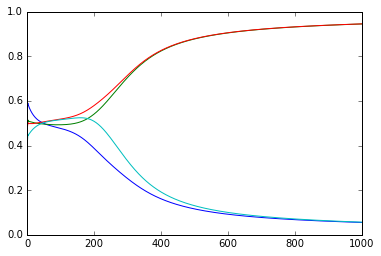

In [404]:
plt.plot(a2.T[0].T);

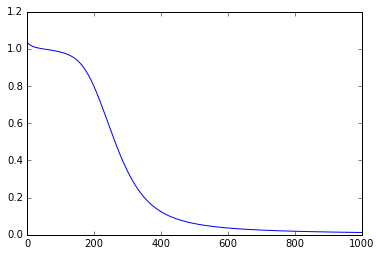

In [405]:
plt.plot(J[0]);

In [225]:
show_graph(graph_def)

### MNIST with TensorFlow

In [406]:
digits = load_digits()
n_samples = len(digits.images)
X, y = digits.images.reshape(n_samples, -1), digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [407]:
Y_train = onehot_encode(y_train, 10)
Y_test = onehot_encode(y_test, 10)

In [408]:
def mlp_tf(X, Y, n_hidden=4, epochs=1000, eta = 0.001, loss='squared'):
    n_features = X.shape[1]
    n_output = Y.shape[1]
    
    tf.reset_default_graph()
    with tf.Graph().as_default():
        with tf.name_scope('Model_Definition'):
            W1 = tf.Variable(uniform(loc=-1, scale=2).rvs(n_features*n_hidden).reshape(n_features,n_hidden), dtype=tf.float32, name='W1')
            W2 = tf.Variable(uniform(loc=-1, scale=2).rvs(n_hidden*n_output).reshape(n_hidden,n_output), dtype=tf.float32, name='W2')

            X_ = tf.Variable(tf.convert_to_tensor(X, dtype=tf.float32), dtype=tf.float32, name='X')
            Y_ = tf.Variable(tf.convert_to_tensor(Y, dtype=tf.float32), dtype=tf.float32, name='y')
            eta_ = tf.constant(eta, dtype=tf.float32, name='eta')
        with tf.name_scope('Feedforward'):
            z1 = tf.matmul(X_, W1)
            a1 = tf.sigmoid(z1)

            z2 = tf.matmul(a1, W2)
            a2 = tf.sigmoid(z2)
        with tf.name_scope('Error_Backpropagation'):
            if loss == 'squared':
                delta2 = tf.multiply(tf.subtract(Y_, a2), tf.multiply(a2, (1-a2)))
                J = tf.reduce_sum(tf.multiply(tf.subtract(Y_, a2), tf.subtract(Y_, a2)), axis=0)
            elif loss == 'logistic':
                delta2 = tf.subtract(Y_, a2)
                J = - tf.reduce_sum(tf.add(tf.multiply(Y_, tf.log(a2)), tf.multiply(1-Y_, tf.log(1-a2))), axis=0)
            else:
                raise AttributeError('Loss must be squared or logistic')
            delta1 = tf.multiply(tf.matmul(delta2, tf.transpose(W2)),tf.multiply(a1, (1-a1)))
        with tf.name_scope('Weights_Update'):
            dW2 = eta_*tf.matmul(tf.transpose(a1), delta2)
            dW1 = eta_*tf.matmul(tf.transpose(X_), delta1)

            W2 = tf.assign_add(W2, dW2)
            W1 = tf.assign_add(W1, dW1)
        with tf.name_scope('Accuracy'):
            correct_prediction = tf.equal(tf.argmax(a2,1), tf.argmax(Y_, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        graph_def = tf.get_default_graph().as_graph_def()
        
        init = tf.global_variables_initializer()

        sess = tf.Session()
        sess.run(init)

        y_fit = []
        Jtrace = []
        score = []
        for i in range(epochs):
            W1_, W2_, yf_, J_, accuracy_ = sess.run([W1, W2, a2, J, accuracy])
            y_fit.append(yf_)
            Jtrace.append(J_)
            score.append(accuracy_)

        sess.close()
    y_fit = np.array(y_fit)
    Jtrace = np.array(Jtrace)
    score = np.array(score)
    return y_fit, Jtrace.T, score, graph_def

In [409]:
a2, J, score, graph_def = mlp_tf(X_train, Y_train, n_hidden=64, epochs=1000, eta=0.001, loss='squared')

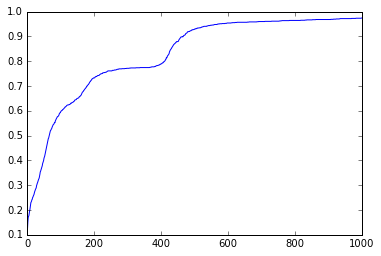

In [410]:
plt.plot(score);

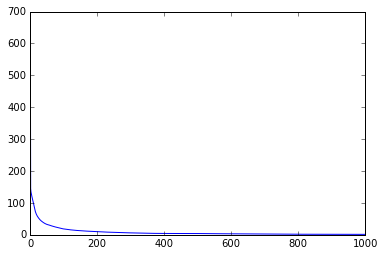

In [411]:
plt.plot(J[0]);

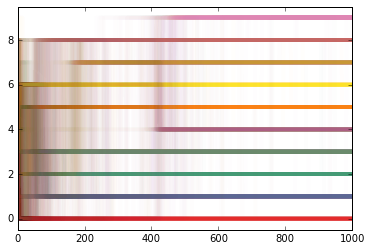

In [412]:
trace = np.array([np.argmax(a2[i], axis=1) for i in range(a2.shape[0])])
cmap = plt.cm.get_cmap('Set1')
traces = np.vstack((trace,y_train)).T
ax = plt.subplot(111)
colors = np.array([cmap(y_train[i]/mlp.n_output_)[:-1] for i in range(len(y_train))])
for i, trace in enumerate(traces):
    ax.plot(trace[:-1], c=colors[i], alpha=0.01, lw=4)
ax.set_ylim(-0.5,9.5);
#ax.set_xscale('log');

In [326]:
show_graph(graph_def)

In [413]:
%lprun -s -f mlp_tf -T lp_results.txt mlp_tf(X_train, Y_train, n_hidden=64, epochs=1000, eta=0.001, loss='squared')
%cat lp_results.txt


*** Profile printout saved to text file 'lp_results.txt'. 
Timer unit: 1e-06 s

Total time: 2.12473 s
File: <ipython-input-408-94c87094ad0a>
Function: mlp_tf at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mlp_tf(X, Y, n_hidden=4, epochs=1000, eta = 0.001, loss='squared'):
     2         1            5      5.0      0.0      n_features = X.shape[1]
     3         1            2      2.0      0.0      n_output = Y.shape[1]
     4                                               
     5         1           14     14.0      0.0      tf.reset_default_graph()
     6         1          132    132.0      0.0      with tf.Graph().as_default():
     7         1           49     49.0      0.0          with tf.name_scope('Model_Definition'):
     8         1        12069  12069.0      0.6              W1 = tf.Variable(uniform(loc=-1, scale=2).rvs(n_features*n_hidden).reshape(n_features,n_hidden), dtype=tf.float32, name='